In [1]:
import numpy as np
import idx2numpy, torch
import matplotlib.pyplot as plt
import random
import torch
from torch.utils.data import TensorDataset, DataLoader
from torch import nn

In [2]:
train_data = idx2numpy.convert_from_file('mnistdata/train-images.idx3-ubyte') / 255
train_label = idx2numpy.convert_from_file('mnistdata/train-labels.idx1-ubyte')
test_data = idx2numpy.convert_from_file('mnistdata/t10k-images.idx3-ubyte') / 255
test_label = idx2numpy.convert_from_file('mnistdata/t10k-labels.idx1-ubyte')

In [3]:
train_data = train_data.reshape(len(train_data),1, 28, 28)
test_data = test_data.reshape(len(test_data), 1, 28, 28)

In [4]:
train_data = torch.from_numpy(train_data).float()
test_data = torch.from_numpy(test_data).float()
train_label = torch.from_numpy(np.array(train_label))
test_label = torch.from_numpy(np.array(test_label))

In [5]:
batch_size = 64
train = TensorDataset(train_data, train_label)
test = TensorDataset(test_data, test_label)
train_loader = DataLoader(train, batch_size = batch_size)
test_loader = DataLoader(test, batch_size = batch_size)

In [6]:
class CNNModule(nn.Module):
    def __init__(self):
        super(CNNModule, self).__init__()
        self.forward_propogation = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16,kernel_size=3, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            
            nn.Flatten(),
            nn.Linear(32*5*5, 16, bias=True),
            nn.ReLU(),
            
            nn.Linear(16, 10, bias=True),
            nn.ReLU()
        )
        
    def forward(self, x):
        output = self.forward_propogation(x)
        return output
    
model = CNNModule()
print(model)

CNNModule(
  (forward_propogation): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=800, out_features=16, bias=True)
    (8): ReLU()
    (9): Linear(in_features=16, out_features=10, bias=True)
    (10): ReLU()
  )
)


In [7]:
n_iters = 3000
num_epochs = n_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)

In [8]:
learning_rate = 0.1
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [9]:
count = 1
losses = []
iterations = []
accuracies = []

for epoch in range(num_epochs):
    for i, (x, y) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(x) 
        y = y.to(torch.long)
        loss = loss_fn(output, y)
        loss.backward()
        optimizer.step()
        
        count += 1
        if count % 50 == 0:
            correct = 0
            total = 0
            for x, y in test_loader:
                output = model(x)
                pred = torch.max(output.data, 1)[1]
                total += len(y)
                correct += (pred == y).sum()
                
            accuracy = 100 * correct / float(total)
            losses.append(loss)
            iterations.append(count)
            accuracies.append(accuracy)
            
        if count % 500 == 0:
            print(f"Iterations {count} Loss {loss.data:>3f} Accuracy {accuracy:>3f}")
            

Iterations 500 Loss 0.047926 Accuracy 94.989998
Iterations 1000 Loss 0.041404 Accuracy 97.419998
Iterations 1500 Loss 0.172903 Accuracy 97.070000
Iterations 2000 Loss 0.045387 Accuracy 97.879997
Iterations 2500 Loss 0.024012 Accuracy 97.900002


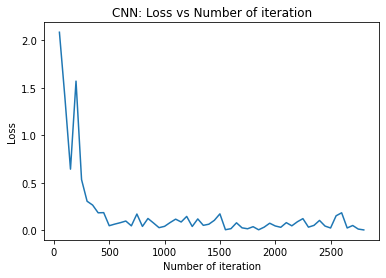

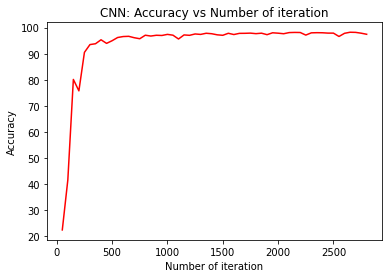

In [10]:
losses = [loss.detach().numpy() for loss in losses]
# visualization loss 
plt.plot(iterations,losses)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("CNN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iterations,accuracies,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("CNN: Accuracy vs Number of iteration")
plt.show()